In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.dynamicBN as gdyn

from math import exp

# Exercice 8

On se propose d'étudier la fiabilité et la maintenance d'un système décrit ainsi



In [2]:
def fiabVar(s):
    return gum.LabelizedVariable(s,s,0).addLabel("NOK").addLabel("OK")

dbn=gum.BayesNet()
a0,b0,at,bt=[dbn.add(fiabVar(s)) for s in ["a0","b0","at","bt"]]

dbn.addArc(a0,at)
dbn.addArc(b0,bt)

ok0=dbn.addAND(fiabVar("ok0"))
dbn.addArc(a0,ok0)
dbn.addArc(b0,ok0)

okt=dbn.addAND(fiabVar("okt"))
dbn.addArc(at,okt)
dbn.addArc(bt,okt)

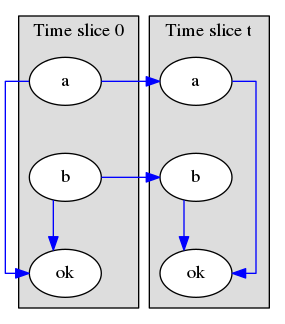

In [3]:
mat = lambda x : [1,0,exp(-x),1-exp(-x)]

dbn.cpt(a0).fillWith([0,1])
dbn.cpt(b0).fillWith([0,1])

dbn.cpt(at).fillWith(mat(4))
dbn.cpt(bt).fillWith(mat(2))

gdyn.showTimeSlices(dbn,format="png")


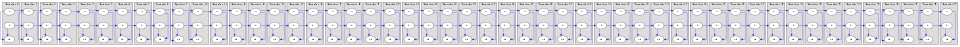

In [4]:
Taille=50

bn=gdyn.unroll2TBN(dbn,Taille)
gdyn.showTimeSlices(bn,size="10")



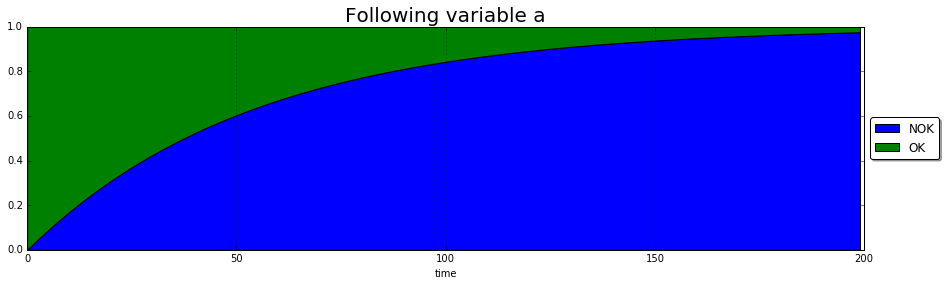

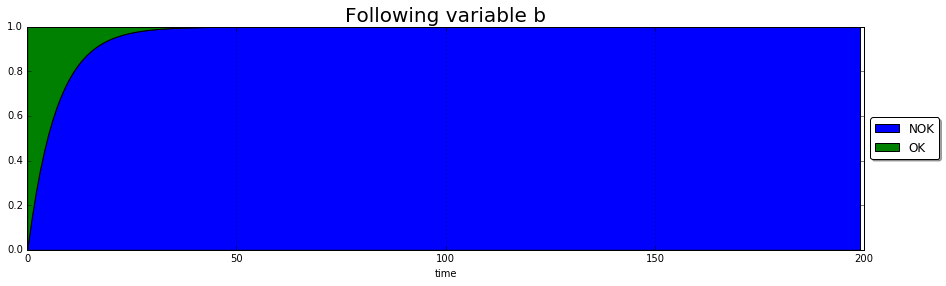

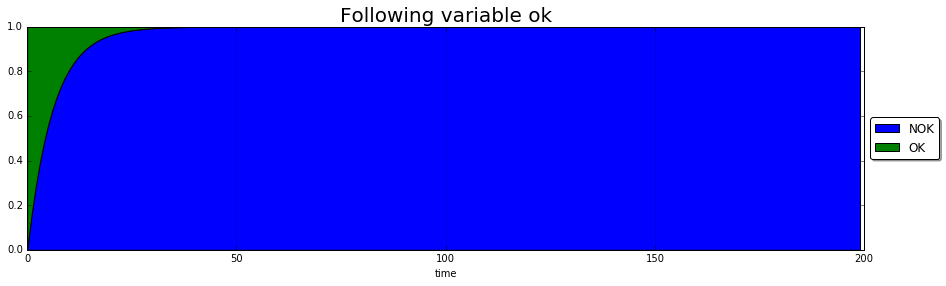

In [5]:
Taille=200

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 4)
gdyn.plotFollow(["a","b","ok"],dbn,T=Taille,evs=[])  

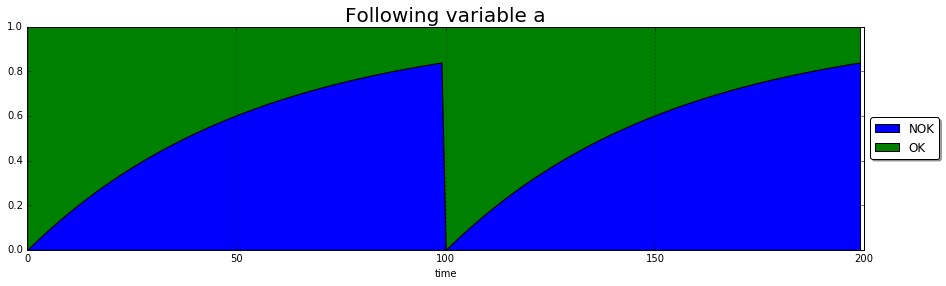

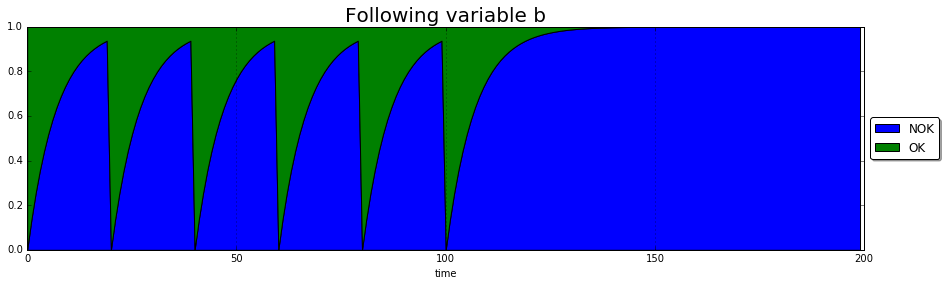

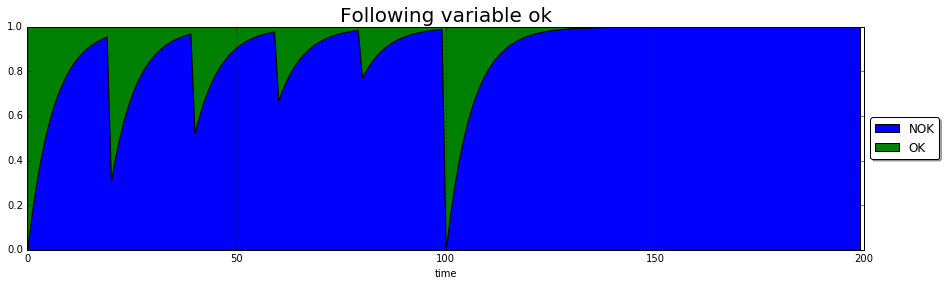

In [6]:
bn=gdyn.unroll2TBN(dbn,Taille)

def repare(bn,var):
    idvar=bn.idFromName(var)
    for p in bn.parents(idvar):
        bn.eraseArc(p,idvar)
    bn.cpt(idvar).fillWith([0,1])
    
repare(bn,"b20")
repare(bn,"b40")
repare(bn,"b60")
repare(bn,"b80")
repare(bn,"b100")
repare(bn,"a100")

gdyn.plotFollowUnrolled(["a","b","ok"],dbn,bn,T=Taille,evs=[]) 